In [251]:
import seaborn as sns

sns.set_style("ticks")

In [252]:
tips = sns.load_dataset("tips", cache=True)
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


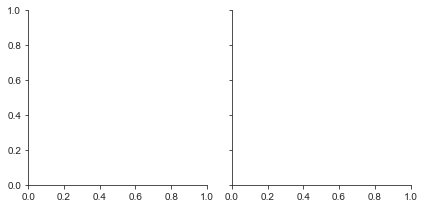

In [253]:
sns.FacetGrid(data=tips, col="time")

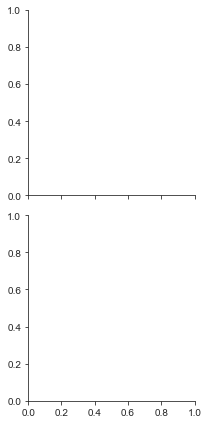

In [254]:
sns.FacetGrid(data=tips, row='time')

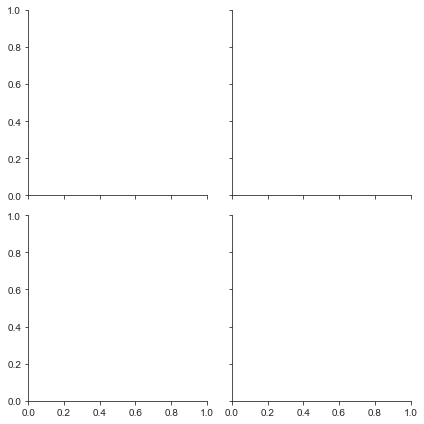

In [255]:
# 分组列为["time", "smoker"]
# 根据分组结果("Male", "Lunch"), ("Male", "Dinner"),("Female", "Lunch"),("Female", "Dinner")绘制四个子图
sns.FacetGrid(data=tips, col="time", row="smoker")

In [256]:
for i in tips[['total_bill', 'tip']].groupby([tips["sex"], tips["time"]]):
    print(i)

(('Male', 'Lunch'),      total_bill   tip
77        27.20  4.00
78        22.76  3.00
79        17.29  2.71
80        19.44  3.00
81        16.66  3.40
83        32.68  5.00
84        15.98  2.03
86        13.03  2.00
87        18.28  4.00
88        24.71  5.85
89        21.16  3.00
120       11.69  2.31
122       14.26  2.50
123       15.95  2.00
126        8.52  1.48
129       22.82  2.18
130       19.08  1.50
138       16.00  2.00
141       34.30  6.70
142       41.19  5.00
148        9.78  1.73
149        7.51  2.00
192       28.44  2.56
193       15.48  2.02
194       16.58  4.00
195        7.56  1.44
196       10.34  2.00
199       13.51  2.00
200       18.71  4.00
204       20.53  4.00
220       12.16  2.20
222        8.58  1.92
224       13.42  1.58)
(('Male', 'Dinner'),      total_bill   tip
1         10.34  1.66
2         21.01  3.50
3         23.68  3.31
5         25.29  4.71
6          8.77  2.00
..          ...   ...
236       12.60  1.00
237       32.83  1.17
239       29

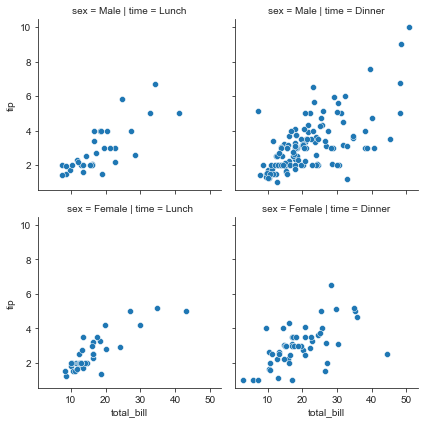

In [257]:
g = sns.FacetGrid(tips, col="time", row="sex")

"""
解析:
在每个子图中通过sns.scatterplot函数依次绘制
    "total_bill"和"tip"列中分组结果为("Male", "Lunch")的数据
    "total_bill"和"tip"列中分组结果为("Male", "Dinner")的数据
    "total_bill"和"tip"列中分组结果为("Female", "Lunch")的数据
    "total_bill"和"tip"列中分组结果为("Female", "Dinner")的数据
"""
g.map_dataframe(sns.scatterplot,
                x="total_bill", y="tip")  # 传递给函数sns.scatterplot的参数

Figure(432x432)
smoker = Yes | time = Lunch

xlim (0.6829999999999998, 53.197)
ylim (0.0, 15.75)
[ 0. 10. 20. 30. 40. 50. 60.]
[]
##############################
smoker = Yes | time = Dinner

xlim (0.6829999999999998, 53.197)
ylim (0.0, 15.75)
[ 0. 10. 20. 30. 40. 50. 60.]
[]
##############################
smoker = No | time = Lunch
total_bill
xlim (0.6829999999999998, 53.197)
ylim (0.0, 15.75)
[ 0. 10. 20. 30. 40. 50. 60.]
[Text(0.0, 0, '0'), Text(20.0, 0, '20'), Text(40.0, 0, '40'), Text(60.0, 0, '60'), Text(0.8, 0, '0.8'), Text(1.0, 0, '1.0'), Text(0, 0, '')]
##############################
smoker = No | time = Dinner
total_bill
xlim (0.6829999999999998, 53.197)
ylim (0.0, 15.75)
[ 0. 10. 20. 30. 40. 50. 60.]
[Text(0.0, 0, '0'), Text(20.0, 0, '20'), Text(40.0, 0, '40'), Text(60.0, 0, '60'), Text(0.8, 0, '0.8'), Text(1.0, 0, '1.0'), Text(0, 0, '')]
##############################
****************************************************************************************************
{('Yes'

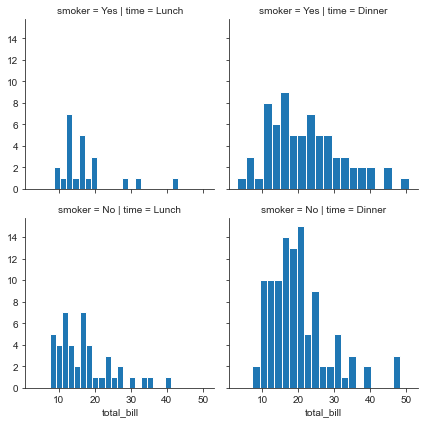

In [258]:
import matplotlib.pyplot as plt

g = sns.FacetGrid(tips, col="time", row="smoker")

g.map_dataframe(plt.hist,
                x="total_bill", bins=20)  # 传递给函数plt.hist的参数

print(g.figure)  # Access the matplotlib.figure.Figure object underlying the grid.

for i in g.figure.get_axes():
    """访问matplotlib底层方式一"""
    print(i.get_title())
    print(i.get_xlabel())
    print('xlim', i.get_xlim())
    print('ylim', i.get_ylim())
    print(i.get_xticks())
    print(i.get_xticklabels(), end='\n' + '#' * 30 + '\n')

print("*" * 100)

print(g.axes_dict)  # An array of the matplotlib.axes.Axes objects in the grid.

for (row_val, col_val), ax in g.axes_dict.items():
    """访问matplotlib底层方式二"""
    print(ax.get_title())
    print(ax.get_title())
    print(ax.get_xlabel())
    print('xlim', ax.get_xlim())
    print('ylim', ax.get_ylim())
    print(ax.get_xticks())
    print(ax.get_xticklabels(), end='\n' + '#' * 30 + '\n')

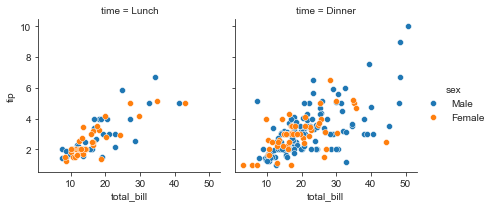

In [259]:
g = sns.FacetGrid(tips,
                  col="time",
                  hue="sex")  # 子图中继续分组
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
g.add_legend()

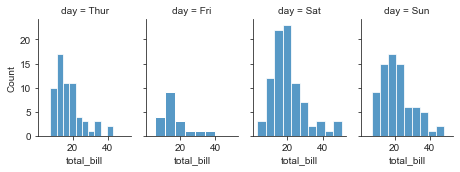

In [260]:
g = sns.FacetGrid(tips, col="day",
                  height=2.5,  # 每个子图的高度
                  # Aspect ratio of each facet, so that aspect * height gives the width of each facet in inches.
                  aspect=.65)  # 子图横轴比
g.map(sns.histplot, "total_bill")